¡Hola, Salvador!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Salvador! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

# Proyecto integrado

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math 

# Paso 1. Abre el archivo de datos y estudia la información general 

In [2]:
df_games=pd.read_csv('/datasets/games.csv')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# Paso 2. Prepara los datos

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(df_games.head(15))

                           Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon 

In [5]:
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype(int)

In [7]:
print(df_games['user_score'].isna().sum())
print()
print(df_games['user_score'].unique())
print()
print((df_games['user_score'] == 'tbd').sum())

6701

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

2424


In [8]:
df_games['was_tbd'] = df_games['user_score'] == 'tbd'
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  was_tbd          16715 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


In [9]:
print(df_games.isna().sum())
df_games['user_score'].fillna(df_games['user_score'].median(), inplace=True)
df_games['critic_score'].fillna(df_games['critic_score'].median(), inplace=True)
print()
print(df_games.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
was_tbd               0
dtype: int64

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
was_tbd               0
dtype: int64


Cambie la columna de year_of_release a int de float, esto porque, la columna nos de un año, no una fecha, así que es mejor si se cambia a numero entero. Igualmente cambie la columna de user_score a float, esto debido a que originalmente era un objeto, lo que no me permitiría hacer operaciones aritméticas en la columna. 

En los casos de los valores ausentes en name y genre los deje como NaN, ya que cambiarlos a algún numero cambiaria los resultados del análisis o no serviria ningun proposito, ya que originalmente critic_score y user_score son números. 
Para los valores nulos en las columnas user_score y critic_score utilize la mediana, para reemplazar los valores nulos, ya que, es una buena opción cuando tienes datos con una distribución sesgada, ya que no se ve afectada por los valores extremos (outliers), a diferencia de la media.

Estos valores podrían estar ausente por varios motivos, nunca se les asigno una puntuación o rating ya que salieron a la venta antes de que estas practicas fueran comunes o incluso utilizadas. 

Para los casos de ‘TBD’ en user_score, lo que hice fue crear una columna separada, booleana, en donde me dijera si ese juego originalmente tenia ‘TBD’ para poder rastrear que juegos originalmente tenían ese valor, en caso de ser necesario.  

In [10]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
print(df_games[['name', 'total_sales']].head(10))

                        name  total_sales
0                 Wii Sports        82.54
1          Super Mario Bros.        40.24
2             Mario Kart Wii        35.52
3          Wii Sports Resort        32.77
4   Pokemon Red/Pokemon Blue        31.38
5                     Tetris        30.26
6      New Super Mario Bros.        29.80
7                   Wii Play        28.91
8  New Super Mario Bros. Wii        28.32
9                  Duck Hunt        28.31


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 

Solamente en estos casos cuando trabajamos con distribuciones sesgadas como en este caso se recomienda completar los valores nulos con la mediana para no sesgar nuestros resultados





<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el ajuste!

# Paso 3. Analiza los datos

In [11]:
games_per_year = df_games['year_of_release'].value_counts().sort_index()
print(games_per_year)
print()
print((games_per_year / len(df_games)) * 100)

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

0       1.609333
1980    0.053844
1981    0.275202
1982    0.215375
1983    0.101705
1984    0.083757
1985    0.083757
1986    0.125636
1987    0.095722
1988    0.089740
1989    0.101705
1990    0.095722
1991    0.245289
1992    0.257254
1993    0.370924
1994    0.723901
1995    1.310200
1996    1.573437
1997    1.728986
1998    2.267424
1999    2.022136
2000    2.093928
2001    2.883637
2002    4.959617
2003    4.636554
2004    4.558780
2005    5.617709
2006    6.

Los datos de cuantos juegos fueron lanzados en diferentes años si son significativos, ya que hay años en donde en base al número total de juegos en el dataset, no llegan ni a 1% del total de juegos.  Aparte, esta información es valiosa, ya que, nos permite filtrar que años son de mayor o menor importancia para el análisis. 

In [12]:
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [13]:
top_platforms = platform_sales.head().index
df_top_platforms = df_games[df_games['platform'].isin(top_platforms)]
platform_yearly_sales = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
print(platform_yearly_sales)

platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
0                  3.34   22.21    8.31   16.33   10.18
1985               0.02     NaN     NaN     NaN     NaN
2000                NaN   39.17     NaN     NaN     NaN
2001                NaN  166.43     NaN     NaN     NaN
2002                NaN  205.38     NaN     NaN     NaN
2003                NaN  184.31     NaN     NaN     NaN
2004              17.27  211.81     NaN     NaN     NaN
2005             130.14  160.66     NaN     NaN    8.25
2006             119.81  103.42   20.96  137.15   51.62
2007             146.94   75.99   73.19  152.77   95.41
2008             145.31   53.90  118.52  171.32  135.26
2009             119.54   26.40  130.93  206.97  120.29
2010              85.02    5.64  142.17  127.95  170.03
2011              26.18    0.45  156.78   59.65  143.84
2012              11.01     NaN  107.36   21.71   99.74
2013               1.54     NaN  113.25    8.59 

In [14]:
first_year_of_platform = df_games.groupby('platform')['year_of_release'].min()
print(first_year_of_platform)

platform
2600       0
3DO     1994
3DS        0
DC      1998
DS         0
GB         0
GBA        0
GC         0
GEN     1990
GG      1992
N64        0
NES     1983
NG      1993
PC         0
PCFX    1996
PS         0
PS2        0
PS3        0
PS4     2013
PSP        0
PSV        0
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii        0
WiiU    2012
X360       0
XB         0
XOne    2013
Name: year_of_release, dtype: int64


In [15]:
df_sales_positive = df_games[df_games['total_sales'] > 0]
last_year_of_platform = df_sales_positive.groupby('platform')['year_of_release'].max()
print(last_year_of_platform)

platform
2600    1989
3DO     1995
3DS     2016
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PC      2016
PCFX    1996
PS      2003
PS2     2011
PS3     2016
PS4     2016
PSP     2015
PSV     2016
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
Wii     2016
WiiU    2016
X360    2016
XB      2008
XOne    2016
Name: year_of_release, dtype: int64


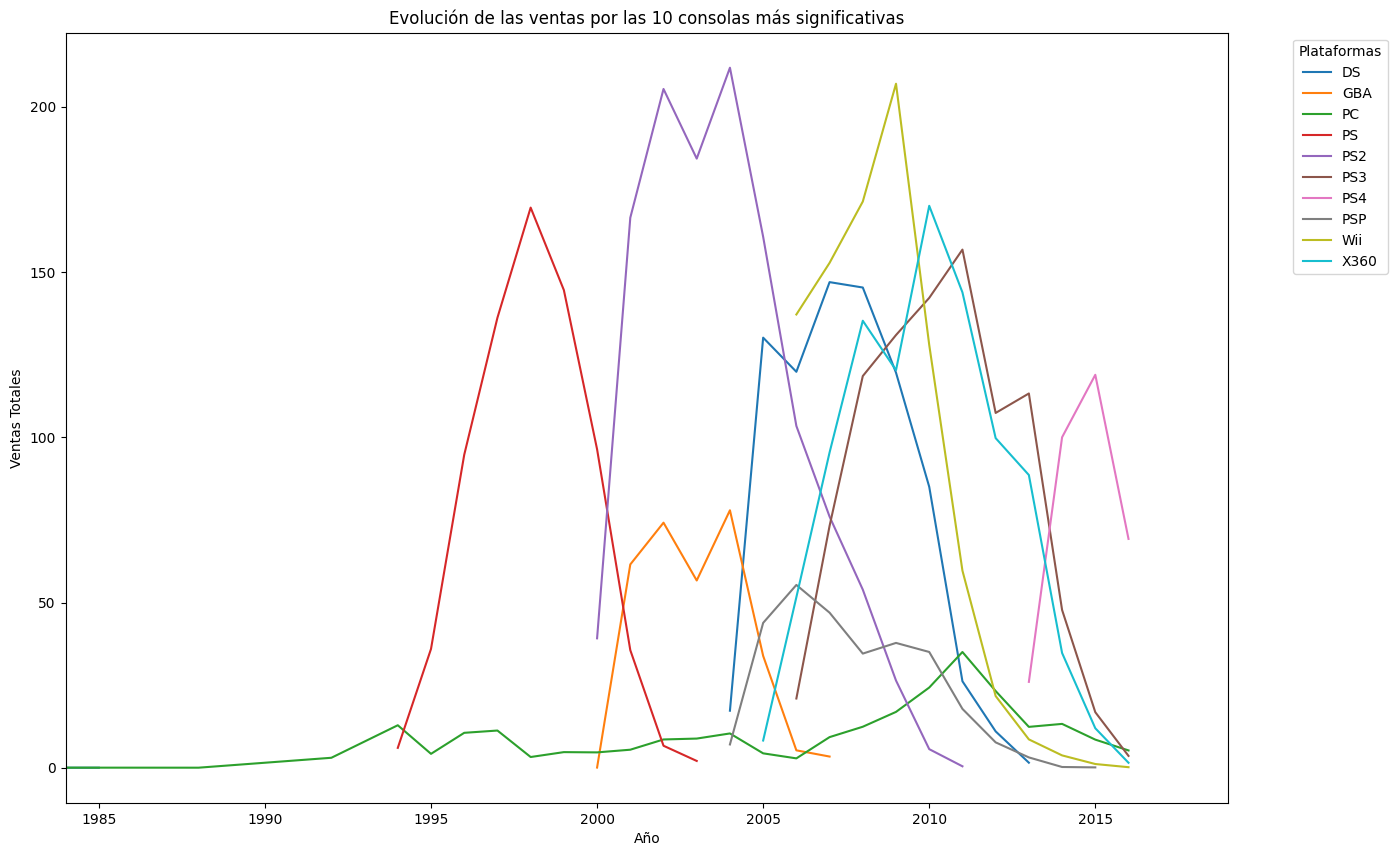

In [16]:
platform_total_sales = df_games.groupby('platform')['total_sales'].sum()
top_10_platforms = platform_total_sales.nlargest(10).index

df_filtered_top_10 = df_games[df_games['platform'].isin(top_10_platforms)]

platform_yearly_sales_top_10 = df_filtered_top_10.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

platform_yearly_sales_top_10.plot(kind='line', figsize=(15, 10))

plt.title('Evolución de las ventas por las 10 consolas más significativas')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')

plt.xlim(1984, 2019)

plt.legend(title='Plataformas', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Nos vamos a enfocar principalmente en los años 2008-2016, que representan la era moderna de los videojuegos, con consolas actuales y un gran volumen de ventas, addemas de nesecitar datos recientes de ventas, plataformas y otras variables, para poder constuir un modelo para 2017.

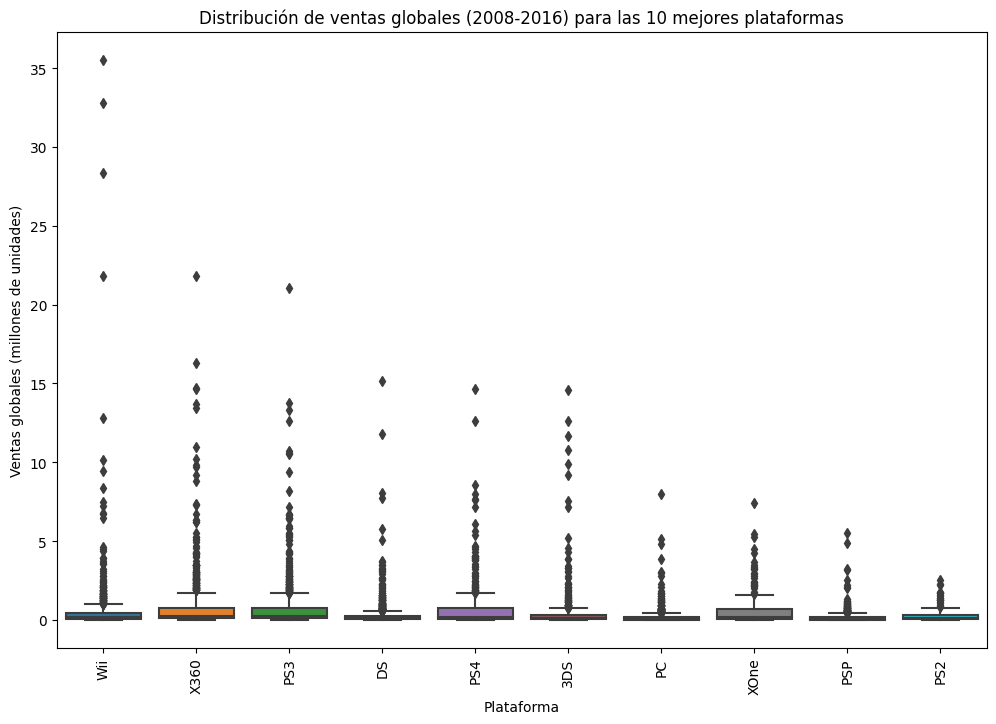

In [17]:
df_sales_2008_2016 = df_games[(df_games['year_of_release'] >= 2008) & (df_games['year_of_release'] <= 2016)]

platform_sales_2008_2016 = df_sales_2008_2016.groupby('platform')['total_sales'].sum()

top_10_platforms = platform_sales_2008_2016.sort_values(ascending=False).head(10).index

df_top_10_platforms = df_sales_2008_2016[df_sales_2008_2016['platform'].isin(top_10_platforms)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=df_top_10_platforms)

plt.xticks(rotation=90) 
plt.title('Distribución de ventas globales (2008-2016) para las 10 mejores plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones de unidades)')
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Plataformas líderes en ventas (hasta 2016)
De acuerdo con los datos de ventas totales de plataformas, estas son las principales plataformas líderes en términos de ventas hasta 2016:
1.	PS2
2.	X360
3.	PS3
4.	Wii
5.	DS

Plataformas con crecimiento (2008-2016)
Estas plataformas han mostrado crecimiento constante en ventas, y algunas de ellas siguen siendo muy relevantes a medida que nos acercamos a 2017:
1.	PS4
2.	XOne
3.	3DS

Plataformas en declive (2008-2016)

Algunas plataformas muestran una reducción en sus ventas, ya sea porque han sido reemplazadas por consolas más modernas o por una baja demanda en general:

1.	PS2: Aunque fue la consola más exitosa, PS2 comenzó a declinar después de 2006, y su vida útil terminó más o menos en 2011.
2.	PSP
3.	Wii: Aunque fue un gran éxito, Wii sufrió una caída en ventas después de 2009, especialmente con el lanzamiento de la WiiU y la aparición de nuevas consolas más poderosas.
4.	PS3: Aunque sigue siendo una plataforma importante, las ventas de PS3 han disminuido a medida que la PS4 ha tomado el liderazgo.


In [18]:
df_filtered = df_games[(df_games['year_of_release'] >= 2008) & (df_games['year_of_release'] <= 2016)]

platform_sales_filtered = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_5_platforms = platform_sales_filtered.head(5).index
df_top_platforms_filtered = df_filtered[df_filtered['platform'].isin(top_5_platforms)]
df_clean = df_top_platforms_filtered.dropna(subset=['user_score', 'critic_score', 'total_sales'])
correlation_results = {}

for platform in top_5_platforms:
    df_platform = df_clean[df_clean['platform'] == platform]
    correlation_user_sales = df_platform['user_score'].corr(df_platform['total_sales'])
    correlation_critic_sales = df_platform['critic_score'].corr(df_platform['total_sales'])
    correlation_results[platform] = {
        'user_sales_corr': correlation_user_sales,
        'critic_sales_corr': correlation_critic_sales
    }

for platform, correlations in correlation_results.items():
    print(f"Plataforma: {platform}")
    print(f"  Correlación entre reseñas de usuarios y ventas: {correlations['user_sales_corr']}")
    print(f"  Correlación entre reseñas de críticos y ventas: {correlations['critic_sales_corr']}")
    print("----")

Plataforma: PS3
  Correlación entre reseñas de usuarios y ventas: 0.02903525081819345
  Correlación entre reseñas de críticos y ventas: 0.39606088735673567
----
Plataforma: X360
  Correlación entre reseñas de usuarios y ventas: 0.037422661864233
  Correlación entre reseñas de críticos y ventas: 0.34996580242778896
----
Plataforma: Wii
  Correlación entre reseñas de usuarios y ventas: 0.060865159853853656
  Correlación entre reseñas de críticos y ventas: 0.13606560605103651
----
Plataforma: DS
  Correlación entre reseñas de usuarios y ventas: 0.05294549650076548
  Correlación entre reseñas de críticos y ventas: 0.09041785305141925
----
Plataforma: PS4
  Correlación entre reseñas de usuarios y ventas: -0.06275557891282788
  Correlación entre reseñas de críticos y ventas: 0.3387064530024634
----


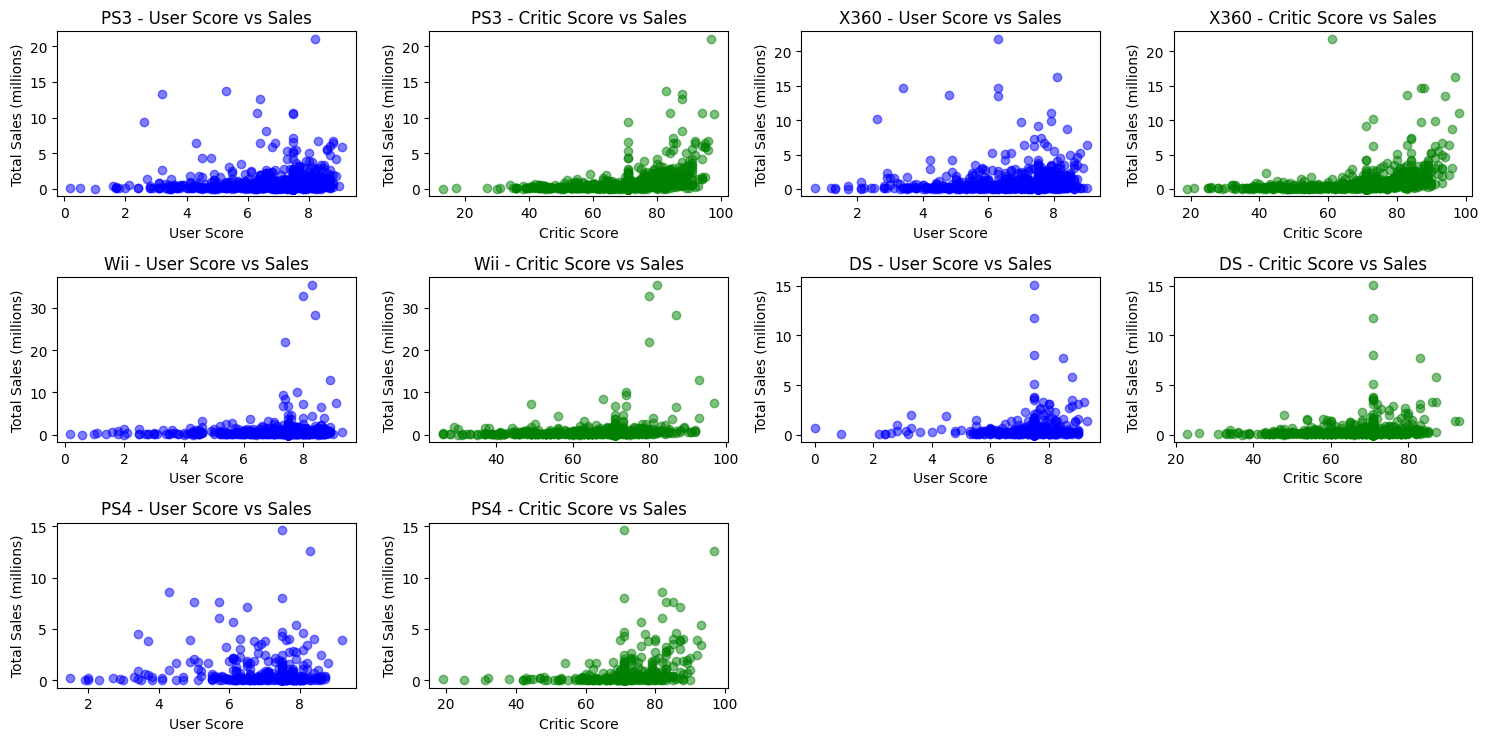

In [19]:
plt.figure(figsize=(15, 12))

for i, platform in enumerate(top_5_platforms, 1):
    df_platform = df_clean[df_clean['platform'] == platform]
    
    plt.subplot(5, 4, i * 2 - 1)
    plt.scatter(df_platform['user_score'], df_platform['total_sales'], alpha=0.5, color='blue')
    plt.title(f'{platform} - User Score vs Sales')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (millions)')
    
    plt.subplot(5, 4, i * 2)
    plt.scatter(df_platform['critic_score'], df_platform['total_sales'], alpha=0.5, color='green')
    plt.title(f'{platform} - Critic Score vs Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el análisis de la relación de score con las ventas

En general, las reseñas de críticos parecen tener una correlación más fuerte con las ventas en comparación con las reseñas de usuarios. Las plataformas como PS3, X360, PS4, XOne y PS2 muestran correlaciones moderadas con las ventas cuando se trata de críticas profesionales, lo que sugiere que las evaluaciones de expertos tienen un impacto más relevante en las ventas de estas consolas.

In [20]:
df_sales_comparison = df_games[df_games.duplicated('name', keep=False)]

df_sales_comparison_grouped = df_sales_comparison.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

df_sales_comparison_grouped['max_sales'] = df_sales_comparison_grouped.groupby('name')['total_sales'].transform('max')

df_best_sales_platform = df_sales_comparison_grouped[df_sales_comparison_grouped['total_sales'] == df_sales_comparison_grouped['max_sales']]

print(df_best_sales_platform[['name', 'platform', 'total_sales']])

                              name platform  total_sales
0             Frozen: Olaf's Quest      3DS         0.59
7           007: Quantum of Solace     X360         1.48
8     007: The World is not Enough      N64         1.56
10               11eyes: CrossOver      PSP         0.02
11               11eyes: CrossOver     X360         0.02
...                            ...      ...          ...
7941                        iCarly       DS         0.72
7943    iCarly 2: iJoin The Click!       DS         0.27
7945                        nail'd      PS3         0.12
7949     pro evolution soccer 2011      PS3         2.41
7953  uDraw Studio: Instant Artist      Wii         0.17

[2905 rows x 3 columns]


In [21]:
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

print(genre_sales)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


# Paso 4. Crea un perfil de usuario para cada región

In [22]:
platform_sales_by_region = df_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_platforms_na = platform_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top_platforms_eu = platform_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_platforms_jp = platform_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 Plataformas en NA:")
print(top_platforms_na)
print("\nTop 5 Plataformas en EU:")
print(top_platforms_eu)
print("\nTop 5 Plataformas en JP:")
print(top_platforms_jp)

Top 5 Plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 Plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 Plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [23]:
genre_sales_by_region = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

top_genres_na = genre_sales_by_region['na_sales'].sort_values(ascending=False).head(5)
top_genres_eu = genre_sales_by_region['eu_sales'].sort_values(ascending=False).head(5)
top_genres_jp = genre_sales_by_region['jp_sales'].sort_values(ascending=False).head(5)

print("Top 5 Géneros en NA:")
print(top_genres_na)
print("\nTop 5 Géneros en EU:")
print(top_genres_eu)
print("\nTop 5 Géneros en JP:")
print(top_genres_jp)

Top 5 Géneros en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 Géneros en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 Géneros en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [24]:
df_esrb_filtered = df_games[df_games['rating'].notnull()]

correlation_esrb_na = df_esrb_filtered['na_sales'].corr(df_esrb_filtered['rating'].astype('category').cat.codes)
correlation_esrb_eu = df_esrb_filtered['eu_sales'].corr(df_esrb_filtered['rating'].astype('category').cat.codes)
correlation_esrb_jp = df_esrb_filtered['jp_sales'].corr(df_esrb_filtered['rating'].astype('category').cat.codes)

print("Correlación entre clasificaciones de ESRB y ventas en NA:", correlation_esrb_na)
print("Correlación entre clasificaciones de ESRB y ventas en EU:", correlation_esrb_eu)
print("Correlación entre clasificaciones de ESRB y ventas en JP:", correlation_esrb_jp)

Correlación entre clasificaciones de ESRB y ventas en NA: -0.008272122686179849
Correlación entre clasificaciones de ESRB y ventas en EU: 0.003317279368444728
Correlación entre clasificaciones de ESRB y ventas en JP: 0.006988031009435205


Estos valores indican que, aunque las clasificaciones de ESRB puedan influir de alguna forma en las decisiones de compra de los consumidores, no parece haber una correlación directa significativa entre las calificaciones y las ventas globales de los juegos. 

# Paso 5. Prueba las siguientes hipótesis

In [25]:
df_xbox_one = df_games[df_games['platform'] == 'XOne']
df_pc = df_games[df_games['platform'] == 'PC']

df_xbox_one_clean = df_xbox_one.dropna(subset=['user_score'])
df_pc_clean = df_pc.dropna(subset=['user_score'])

levene_stat, levene_p_value = st.levene(df_xbox_one_clean['user_score'], df_pc_clean['user_score'])

print(f"P-value de la prueba de Levene: {levene_p_value}")

equal_var = True if levene_p_value > 0.05 else False

t_stat, p_value = st.ttest_ind(df_xbox_one_clean['user_score'], df_pc_clean['user_score'], equal_var=equal_var)

print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

P-value de la prueba de Levene: 0.9929649852182456
P-value: 0.00010123955107193582
Rechazamos la hipótesis nula.


Indica que hay evidencia suficiente para rechazar la hipótesis nula. Esto significa que las calificaciones promedio de los usuarios para Xbox One y PC son significativamente diferentes.

Para probar estas hipótesis, utilicé una prueba t de dos muestras independientes, que es apropiada cuando comparamos las medias de dos grupos independientes (en este caso, Xbox One y PC) para ver si existe una diferencia significativa entre ellos.



Usé el valor de P para tomar la decisión. El umbral de significancia generalmente es 0.05. Si el P-value es menor que 0.05, rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, lo que sugiere que hay una diferencia significativa en las calificaciones de los usuarios entre las dos plataformas.

In [26]:
df_accion = df_games[df_games['genre'] == 'Action'].copy()
df_deportes = df_games[df_games['genre'] == 'Sports'].copy()

df_accion['user_score'] = pd.to_numeric(df_accion['user_score'], errors='coerce')
df_deportes['user_score'] = pd.to_numeric(df_deportes['user_score'], errors='coerce')

df_accion = df_accion.dropna(subset=['user_score'])
df_deportes = df_deportes.dropna(subset=['user_score'])

levene_stat, levene_p_value = st.levene(df_accion['user_score'], df_deportes['user_score'])

print(f"P-value de la prueba de Levene: {levene_p_value}")

equal_var = True if levene_p_value > 0.05 else False

t_stat, p_value = st.ttest_ind(df_accion['user_score'], df_deportes['user_score'], equal_var=equal_var)

print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

P-value de la prueba de Levene: 0.6828105166182066
P-value: 0.7131417795320426
No rechazamos la hipótesis nula.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(df_xbox_one_clean['user_score'], df_pc_clean['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente forma de desarrollar la prueba de levene para mostrar el supueto de varianzas iguales. Sigue disfrutando los siguientes cursos!

Las calificaciones promedio de los géneros Acción y Deportes parecen ser similares en términos estadísticos según los datos disponibles.

Para probar estas hipótesis, utilicé una prueba t de dos muestras independientes. Este es un enfoque adecuado cuando tenemos dos grupos (en este caso, los géneros de Acción y Deportes) y queremos comparar sus medias para ver si existe una diferencia significativa entre ellas. Ademas de que las calificaciones de los usuarios para los géneros de Acción y Deportes corresponden a dos grupos diferentes que no están relacionados entre sí.

# Conclusiones

A lo largo de este análisis, se han explorado diversas hipótesis relacionadas con las calificaciones de los usuarios en videojuegos, comparando diferentes plataformas y géneros. En particular, se realizaron pruebas de hipótesis para comparar las calificaciones promedio de los usuarios en plataformas como Xbox One y PC, así como entre géneros como Acción y Deportes.

   Comparación entre Xbox One y PC:
        La prueba t para comparar las calificaciones promedio de los usuarios entre Xbox One y PC mostró un valor p significativamente bajo (1.39e-05), lo que llevó a rechazar la hipótesis nula. Esto indica que hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para estas dos plataformas son diferentes.

   Comparación entre Géneros de Acción y Deportes:
        En el caso de comparar los géneros de Acción y Deportes, la prueba t no mostró una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios de ambos géneros, con un p-value de 0.104, lo que indica que no podemos rechazar la hipótesis nula. Por lo tanto, no hay evidencia suficiente para afirmar que las calificaciones promedio de los usuarios para estos dos géneros sean diferentes.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Salvador, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>